In [1]:
from pydataxm import *                           #Se realiza la importación de las librerias necesarias para ejecutar                        
from pydataxm.pydataxm import ReadDB as apiXM 
import datetime as dt                            
import pandas as pd
from pathlib import Path
import os

from google.cloud import bigquery
from google.oauth2 import service_account

In [2]:
# Información del proyecto y autenticación a BQ
project_id = "enersinc-tbsg-bq"
key_path = "C:\BigQuery\eramirez-tbsg.json"

# Cargar las credenciales del archivo JSON
credentials = service_account.Credentials.from_service_account_file(key_path)

# Crear el cliente de BigQuery
client = bigquery.Client(project=project_id, credentials=credentials)

In [3]:
FechaIni=pd.to_datetime('2024-01-01')
FechaFin=pd.to_datetime('2024-12-31')

In [12]:
# Consulta a la maestra de recursos
query = rf"""

select * 
from
tbsg.public_grip
where fechaoperacion >= '{FechaIni.strftime('%Y-%m-%d')}' and fechaoperacion <= '{FechaFin.strftime('%Y-%m-%d')}' and  tipo='GREA'
and planta in ('TBQ3','TBQ4') and version = 'txf'

"""

# Ejecutar la consulta
df_grea_ini = client.query(query).to_dataframe()

In [13]:
df_grea_ini

,fechaoperacion,planta,tipo,version,hora1,hora2,hora3,hora4,hora5,hora6,...,hora15,hora16,hora17,hora18,hora19,hora20,hora21,hora22,hora23,hora24
0,2024-01-10,TBQ3,GREA,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2024-01-20,TBQ4,GREA,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2024-02-02,TBQ4,GREA,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2024-02-12,TBQ4,GREA,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2024-05-30,TBQ3,GREA,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2024-01-24,TBQ3,GREA,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
728,2024-03-10,TBQ3,GREA,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,14901.47,32320.62,33729.52,33368.94,42122.04,43053.87,41831.01,34024.45,42804.94,33205.92
729,2024-03-13,TBQ3,GREA,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
730,2024-05-19,TBQ3,GREA,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [14]:
# Consulta a la maestra de recursos
query = rf"""

select * 
from
tbsg.public_grip
where fechaoperacion >= '{FechaIni.strftime('%Y-%m-%d')}' and fechaoperacion <= '{FechaFin.strftime('%Y-%m-%d')}' and  tipo='GPRO'
and planta in ('TBQ3','TBQ4') and version = 'txf'

"""

# Ejecutar la consulta
df_gpro_ini = client.query(query).to_dataframe()

In [15]:
df_gpro_ini

,fechaoperacion,planta,tipo,version,hora1,hora2,hora3,hora4,hora5,hora6,...,hora15,hora16,hora17,hora18,hora19,hora20,hora21,hora22,hora23,hora24
0,2024-12-28,TBQ4,GPRO,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-12-22,TBQ4,GPRO,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-03-22,TBQ4,GPRO,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,5017.03,15000.00,33000.00,50000.0,60000.0,60000.0,50000.0,33000.0,33000.0
3,2024-10-13,TBQ4,GPRO,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,15200.11,53377.23,59266.55,59448.54,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0
4,2024-08-17,TBQ4,GPRO,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2024-01-31,TBQ4,GPRO,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
728,2024-06-12,TBQ4,GPRO,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
729,2024-01-04,TBQ3,GPRO,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
730,2024-01-15,TBQ3,GPRO,txf,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,5777.10,15000.00,33000.00,53000.0,50000.0,60000.0,60000.0,52000.0,33000.0


In [32]:
df_grea = df_grea_ini.copy()
df_gpro = df_gpro_ini.copy()

for i in range(1,25):

    df_grea = df_grea.rename(columns={f'hora{i}': i})
    df_gpro = df_gpro.rename(columns={f'hora{i}': i})

df_grea = df_grea.melt(id_vars=['fechaoperacion', 'planta'], 
                       value_vars=[i for i in range(1, 25)], 
                       var_name='periodo', 
                       value_name='grea')

df_gpro = df_gpro.melt(id_vars=['fechaoperacion', 'planta'], 
                       value_vars=[i for i in range(1, 25)], 
                       var_name='periodo', 
                       value_name='gpro')


df_data=df_grea.merge(df_gpro,left_on=['fechaoperacion', 'planta','periodo'],right_on=['fechaoperacion', 'planta','periodo'],how='inner')[['fechaoperacion', 'planta','periodo','grea','gpro']]

df_data['Desviacion%']=(((df_data['grea']/df_data['gpro'])-1)*100).round(2)

df_data['Desviacion%']=df_data['Desviacion%'].fillna(0)

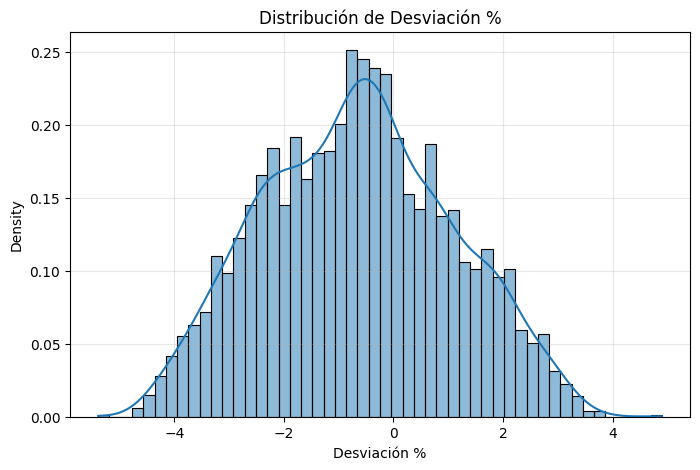

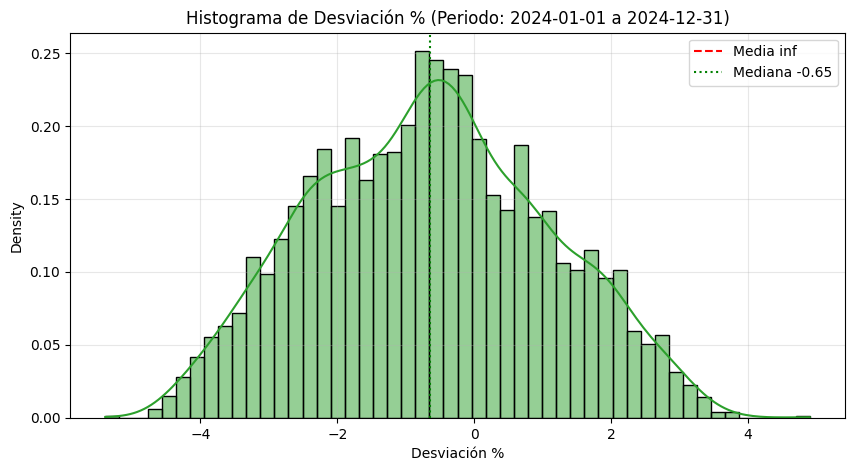

In [37]:
import seaborn as sns

df_data
import matplotlib.pyplot as plt

devi = df_data['Desviacion%'].dropna()
devi = devi[devi != 0]
# Quitar valores menores a -10
devi = devi[devi > -10]

if devi.empty:
    print("No hay valores distintos de cero en 'Desviacion%'.")
else:
    plt.figure(figsize=(8,5))
    sns.histplot(devi, kde=True, stat="density", bins=50, color='C0')
    plt.xlabel('Desviación %')
    plt.title("Distribución de Desviación %")
    plt.grid(alpha=0.3)
    plt.show()


    # Histograma adicional con líneas de media y mediana
    if devi.empty:
        print("No hay datos para graficar el histograma adicional.")
    else:
        plt.figure(figsize=(10,5))
        sns.histplot(devi, kde=True, stat="density", bins=50, color='C2')
        plt.axvline(devi.mean(), color='red', linestyle='--', linewidth=1.5, label=f'Media {devi.mean():.2f}')
        plt.axvline(devi.median(), color='green', linestyle=':', linewidth=1.5, label=f'Mediana {devi.median():.2f}')
        plt.xlabel('Desviación %')
        plt.title(f'Histograma de Desviación % (Periodo: {FechaIni.date()} a {FechaFin.date()})')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.show()